In [2]:
##imports

import numpy as np
import matplotlib.pyplot as plt
from lxml import etree
import sys
import pickle

In [3]:
## generate locations of markers

mode='dome'
if(mode=='full_sphere'):
    r=2
    lin_phi = np.linspace(0, 2*np.pi, 18) # causes last markers overlap first ones 
    lin_theta = np.linspace(-0.45*np.pi, 0.45*np.pi, 10) # if we go up to pi/2 markers will overlap at poles
elif (mode=='dome'):
    r=2
    lin_phi = np.linspace(0, 2*np.pi, 8)
    lin_theta = np.linspace(15/180*np.pi, 0.5*np.pi-15/180*np.pi, 3)
else:
    raise BaseException("none of the options chosen")
    
lin_phi = lin_phi[:-1] #disgard last element as it is overlaid over other marker

_theta, _phi = np.meshgrid(lin_theta, lin_phi)
x = (r*np.cos(_theta)*np.cos(_phi)).flatten()
y = (r*np.cos(_theta)*np.sin(_phi)).flatten()
z = (r*np.sin(_theta)).flatten()
theta=_theta.flatten()
phi=_phi.flatten()

In [4]:
points = [x, y, z, theta, phi]
with open('points.p', 'wb') as f:  # open a text file
    pickle.dump(points, f) # serialize the list

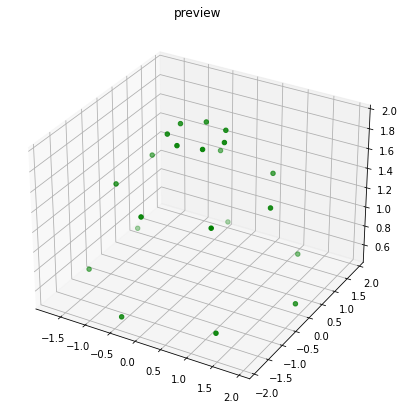

In [5]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("preview")
 
# show plot
plt.show()

In [6]:
## import XML tree from file

parser = etree.XMLParser(remove_blank_text=True)
tree = etree.parse("/home/armin/catkin_ws/src/arc/gazebo/sim/worlds/empty_backup.world", parser)
world_node=tree.xpath("//world")[0]

In [7]:
## generate XML for markers

num_markers = len(x)
print('There are {} markers to be positioned in the world'.format(num_markers))

for i in  range(num_markers):
    include_node=etree.Element("include")
    uri_node = etree.Element("uri")
    pose_node = etree.Element("pose")
    uri_node.text='model://marker_{}'.format(i+1)
    pose_node.text='{:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(x[i], y[i], z[i], 0, np.pi/2-theta[i], phi[i])
    print(pose_node.text)
    include_node.append(uri_node)
    include_node.append(pose_node)
    world_node.append(include_node)




There are 21 markers to be positioned in the world
1.9319 0.0000 0.5176 0.0000 1.3090 0.0000
1.4142 0.0000 1.4142 0.0000 0.7854 0.0000
0.5176 0.0000 1.9319 0.0000 0.2618 0.0000
1.2045 1.5104 0.5176 0.0000 1.3090 0.8976
0.8817 1.1057 1.4142 0.0000 0.7854 0.8976
0.3227 0.4047 1.9319 0.0000 0.2618 0.8976
-0.4299 1.8834 0.5176 0.0000 1.3090 1.7952
-0.3147 1.3788 1.4142 0.0000 0.7854 1.7952
-0.1152 0.5047 1.9319 0.0000 0.2618 1.7952
-1.7405 0.8382 0.5176 0.0000 1.3090 2.6928
-1.2742 0.6136 1.4142 0.0000 0.7854 2.6928
-0.4664 0.2246 1.9319 0.0000 0.2618 2.6928
-1.7405 -0.8382 0.5176 0.0000 1.3090 3.5904
-1.2742 -0.6136 1.4142 0.0000 0.7854 3.5904
-0.4664 -0.2246 1.9319 0.0000 0.2618 3.5904
-0.4299 -1.8834 0.5176 0.0000 1.3090 4.4880
-0.3147 -1.3788 1.4142 0.0000 0.7854 4.4880
-0.1152 -0.5047 1.9319 0.0000 0.2618 4.4880
1.2045 -1.5104 0.5176 0.0000 1.3090 5.3856
0.8817 -1.1057 1.4142 0.0000 0.7854 5.3856
0.3227 -0.4047 1.9319 0.0000 0.2618 5.3856


In [30]:
## Export XML
text_file = open("markers_few.world", "w")
str=etree.tostring(tree, pretty_print=True).decode(sys.stdout.encoding)
text_file.write(str)
text_file.close()
